## Numerical Floquet

Welcome to this Jupyter notebook.
We will analyze the stability of periodic dynamical systems.

In [1]:
from differential_equations import lotka_volterra
from numerical_integration import solve_ode, RK4step
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

Could not find GLIMDA.


In [2]:
t_eval = np.linspace(0, 20, 2000)

In [5]:
initial_value = 0.1

In [ ]:
y_exponential = [[initial_value]]
for i,t in enumerate(t_eval):
    y_exponential.append(exponential)

In [22]:
initial_value = [1, 4]  # Initial values for [x, y]
step_size = 0.0001
num_iterations = 20000
param = (3, 9, 15, 15)

result = solve_ode(initial_value, step_size, num_iterations, ode_func=lotka_volterra, param=param, stepper_func=RK4step)

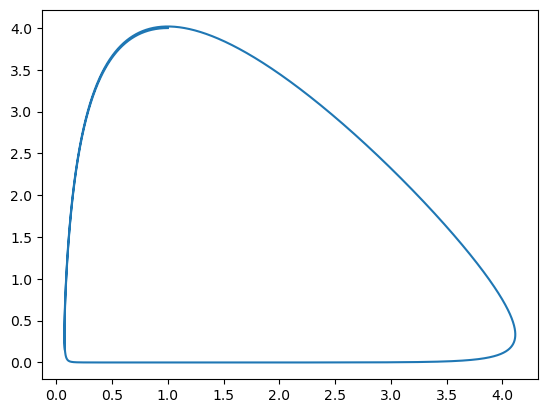

In [23]:
lotka = [i[0] for i in result]
volterra = [i[1] for i in result]
plt.plot(lotka,volterra)

In [7]:
import numpy as np
from scipy.integrate import RK45
from scipy.optimize import fsolve

def Poincare_ND(F, S, h, y0, max_crossings=3):
    tol = 1e-5
    t = np.arange(0, 10 + h, h)
    num_dimensions = len(y0)
    approx = np.zeros((len(t), num_dimensions))
    approx[0, :] = y0
    crossings = []

    def event(y):
        return [y[i] - approx[i, i] for i in range(num_dimensions)]

    for i in range(len(t) - 1):
        sol = RK45(lambda t, y: F(t, y), t[i], approx[i, :], t[i+1], rtol=1e-6, atol=1e-9)
        
        while sol.status == 'running':
            sol.step()

        crossing_point = fsolve(event, approx[i, :])
        
        if len(crossing_point) > 0:
            crossings.append(crossing_point)
            if len(crossings) == max_crossings:
                break

    return np.array(crossings)

# Example usage
def F_ND(t, y):
    # Modify this function to match your N-dimensional system
    # dydt should be a list of derivatives for each dimension
    # Example: For a 2D system: [a * y[0] - b * y[0] * y[1], -c * y[1] + d * y[0] * y[1]]
    a,b,c,d = (2,3,1,2)
    dydt = [a * y[0] - b * y[0] * y[1], -c * y[1] + d * y[0] * y[1]]  # Replace with actual derivatives
    return dydt

S_ND = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])  # Sample S matrix for N-dimensional system
h = 0.01
y0_ND = [0.05, 0.07]  # Initial conditions for N-dimensional system

P_ND = Poincare_ND(F_ND, S_ND, h, y0_ND)
print(P_ND)

[[0.05 0.  ]
 [0.05 0.  ]
 [0.05 0.  ]]
